# Unsupervised Learning (K-Mean Algorythm)

In [2]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support
from mpl_toolkits.mplot3d import Axes3D

# do ploting inline instead of in a separate window
%matplotlib inline

In [34]:
def findClosestCentroids(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    idx = [0] * m
    
    for i in range(m):
        min_norm = np.sum((X[i, :] - centroids[0, :])**2)
        idx[i] = 0; 
        for j in range(K):
            next_norm = np.sum((X[i, :].T - centroids[j, :].T)**2)
            if next_norm < min_norm:
                idx[i] = j;
                min_norm = next_norm;
                
    return np.array([idx]).T

In [35]:
def computeCentroids(X, idx, K):
    n = X.shape[1]
    centroids = np.zeros((K, n))
    idx = np.array([idx])
    np.where(x == 2, 1, 0)
    for i in range(K):
        idx_bin = np.where(idx == i, 1, 0)
        centroids[i, :] = (np.dot(X.T, idx_bin)).T / np.sum(idx_bin)
    
    return centroids

In [36]:
data = pd.read_csv('./data/data-for-clustering.txt', header=None)
data.head(5)

,0,1
0,1.84208,4.60757
1,5.65858,4.79996
2,6.35258,3.29085
3,2.90402,4.61220
4,3.23198,4.93989


In [37]:
data.tail(5)

,0,1
295,7.30279,3.38016
296,6.99198,2.98707
297,4.82553,2.77962
298,6.11768,2.85476
299,0.94049,5.71557


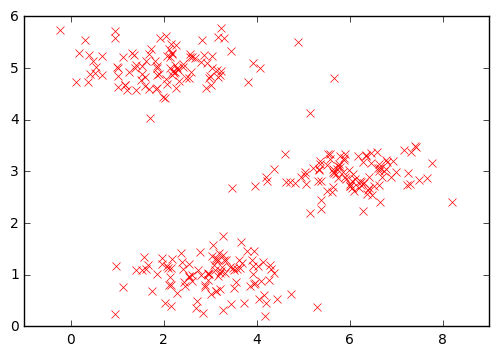

In [52]:
plt.figure()
plt.plot(data[0].values, data[1].values, 'rx')
plt.show()

In [49]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = findClosestCentroids(np.array(data), initial_centroids)
centroids = computeCentroids(np.array(data), idx, 3);

In [50]:
centroids

array([[ 2.42830089,  3.15792429],
       [ 5.8135032 ,  2.63365641],
       [ 7.11938667,  3.61668167]])

In [53]:
def runkMeans(X, initial_centroids, max_iters):
    centroids = initial_centroids
    K = initial_centroids.shape[0]
    for i in range(1, max_iters + 1):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K);
        
    return centroids, idx

In [54]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
result_centroids, result_idx = runkMeans(np.array(data), initial_centroids, 100)

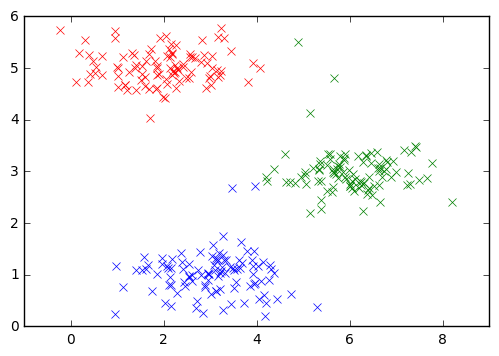

In [79]:
def selectClusterEntries(X, idx, k_num):
    result = X
    for i in reversed(range(idx.shape[0])):
        if idx[i, 0] != k_num:
            result = np.delete(result, i, 0)
            
    return result

zero_cluster = selectClusterEntries(np.array(data), result_idx, 0)
first_cluster = selectClusterEntries(np.array(data), result_idx, 1)
second_cluster = selectClusterEntries(np.array(data), result_idx, 2)
            
m, n = data.shape
# print(zero_cluster.shape[0] + first_cluster.shape[0] + second_cluster.shape[0])

plt.figure()
plt.plot(zero_cluster[:, 0], zero_cluster[:, 1], 'rx')
plt.plot(result_centroids[:, 0], result_centroids[:, 1], 'bo', linewidth=2)
plt.plot(first_cluster[:, 0], first_cluster[:, 1], 'bx')
plt.plot(second_cluster[:, 0], second_cluster[:, 1], 'gx')
plt.show()